### 1. Import Libraries

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
from datetime import datetime as dt
import pandas_profiling
import matplotlib.pyplot as plt

### 2. Loading Data

In [137]:
#abrindo arquivo csv
data=pd.read_csv('/home/isisaraujo/Repos/Projeto_piloto.PMSE/1Cipm/datasets/dados2021.csv')
data.head()

,Data de Criação,Hora de Criação,Ocorrência,Endereço,Bairro,Município,Cód. Tipo,Descrição,Cód. Sub Tipo,Desc. Sub Tipo,...,XCORD,YCORD,Aberto,Despachado,Tempo Despacho,Chegada Local,Tempo Deslocamento,Fechado,Placa,Unnamed: 28
0,01/01/2021,00:07:53,M2468398,"POV CAUEIRA, 140 : EST",.NI,.ITAPORANGA DAJUDA,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,NaN,NaN,...,696314.0,8759707,01/01/2021 00:07:53,01/01/2021 00:42:54,00: 35: 01,01/01/2021 03:25:05,02: 42: 11,01/01/2021 03:25:26,NaN,NaN
1,01/01/2021,00:18:49,M2468421,"RUA SEM DENOMINACAO, 261 : EST",.NI,.ITAPORANGA DAJUDA,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,E08420.1,EM RESIDENCIA,...,678340.0,8780424,01/01/2021 00:18:49,01/01/2021 00:35:27,00: 16: 38,01/01/2021 02:13:27,01: 38: 00,01/01/2021 02:16:03,NaN,NaN
2,01/01/2021,00:21:27,M2468428,"AV MARGINAL, 41 : EST",.CJ BRG EDUARDO GOMES,.SAO CRISTOVAO,E08340,DIRECAO PERIGOSA DE VEICULO,E08340.1,EM VIA PUBLICA,...,705542.0,8790527,01/01/2021 00:21:27,-,::,-,-,01/01/2021 00:37:37,NaN,NaN
3,01/01/2021,00:24:42,M2468431,"RUA SETENTA E CINCO CJ BRG EDUARDO GOMES, 10 :...",.CJ BRG EDUARDO GOMES,.SAO CRISTOVAO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,E08420.1,EM RESIDENCIA,...,705701.0,8791625,01/01/2021 00:24:42,-,::,-,-,01/01/2021 02:43:19,NaN,NaN
4,01/01/2021,00:25:25,M2468433,"RUA B CJ BRG EDUARDO GOMES, 2 :NUMERAL INFORMA...",.CJ BRG EDUARDO GOMES,.SAO CRISTOVAO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,E08420.2,EM VEICULO,...,704648.0,8790731,01/01/2021 00:25:25,01/01/2021 02:53:25,02: 28: 00,-,-,01/01/2021 02:53:42,NaN,NaN


In [138]:
#listando locunas
data.columns

Index(['Data de Criação', 'Hora de Criação', 'Ocorrência', 'Endereço',
       'Bairro', 'Município', 'Cód. Tipo', 'Descrição', 'Cód. Sub Tipo',
       'Desc. Sub Tipo', 'Sit. Encontrada', 'Batalhão', 'COMPANHIA', 'Viatura',
       'Cód. Final.', 'Descrição Finalização', 'Obs. Finalização',
       'Solicitante', 'Telefone', 'XCORD', 'YCORD', 'Aberto', 'Despachado',
       'Tempo Despacho', 'Chegada Local', 'Tempo Deslocamento', 'Fechado',
       'Placa', 'Unnamed: 28'],
      dtype='object')

### 3. Tratando os dados para extrair informações

In [139]:
#excluindo colunas
data=data.drop(['Hora de Criação', 'Endereço',
       'Bairro', 'Cód. Sub Tipo',
       'Desc. Sub Tipo', 'Sit. Encontrada', 'Batalhão', 'COMPANHIA', 'Viatura',
       'Cód. Final.', 'Obs. Finalização',
       'Solicitante', 'Telefone', 'XCORD', 'YCORD', 'Aberto', 'Despachado',
       'Tempo Despacho', 'Chegada Local', 'Tempo Deslocamento', 'Fechado',
       'Placa','Unnamed: 28'], axis=1)

### 3.1 Achando os Dados nulus do Dataframe

In [140]:
#Achar dados nulos em um dataframe
data.isnull().sum().sort_values(ascending=False)[:10]

Descrição Finalização    7
Descrição                0
Cód. Tipo                0
Município                0
Ocorrência               0
Data de Criação          0
dtype: int64

In [141]:
df=data.rename(columns={'Data de Criação':'Data', 'Descrição Finalização':'Descrição_Finalização'})

In [142]:
df1=df.copy()

In [143]:
# identificar o valor mais frequente na coluna Descrição Finalização para ser substituído
print(df1.Descrição_Finalização.value_counts())
Descrição_Finalização_freq = df1.Descrição_Finalização.value_counts().index[0]
df1.Descrição_Finalização.value_counts().index[0]

NADA CONSTATADO                                         2066
RESOLVIDO NO LOCAL                                       482
FALTA DE VIATURA DISPONIVEL NA AREA E ESPECIALIZADAS     332
AUTOR EVADIU-SE DO LOCAL                                 276
OCORRÊNCIA JÁ ATENDIDA                                   145
SOLICITANTE NÃO INF. O SUFICIENTE                        101
ENDEREÇO NÃO LOCALIZADO                                   83
CONDUZIDO A DELEGACIA                                     72
DESISTÊNCIA DO SOLICITANTE                                36
NÃO É COMPETÊNCIA PM/BM/PC                                22
QTC GERAL                                                 19
TRANSFERIDO PARA OUTRO ÓRGÃO/ÁREA                         17
OUTRA VTR NO LOCAL                                        15
TERMO CIRCUNSTANCIADO                                     11
LAVRADO AUTO DE INFRAÇÃO DE TRÂNSITO                       5
CONTINGÊNCIA                                               2
Name: Descrição_Finaliza

'NADA CONSTATADO'

In [144]:
#preencher valores faltando pelo pelo valor que mais aparece
df1.Descrição_Finalização.fillna(Descrição_Finalização_freq, inplace=True)

In [145]:
# verificar se há valor ausente
df1.Município.isnull().sum()

0

In [146]:
#Achar dados nulos em um dataframe
df1.isnull().sum().sort_values(ascending=False)[:10]

Descrição_Finalização    0
Descrição                0
Cód. Tipo                0
Município                0
Ocorrência               0
Data                     0
dtype: int64

### 3.2 Incluir Coluna para posterior manipulação e tipos de variáveis

In [147]:
#verificando os tipos de variáveis
df1.dtypes 

Data                     object
Ocorrência               object
Município                object
Cód. Tipo                object
Descrição                object
Descrição_Finalização    object
dtype: object

In [148]:
# Garantir que o formato date é um datetime(formato .br)
df1['Data'] = pd.to_datetime( df1['Data'], format='%d/%m/%Y' )

In [149]:
#Confirmando datetime
df1.dtypes 

Data                     datetime64[ns]
Ocorrência                       object
Município                        object
Cód. Tipo                        object
Descrição                        object
Descrição_Finalização            object
dtype: object

In [150]:
#Criando colunas de acordo com as datas e filtrando por meses
df1['Data']=pd.to_datetime(df1['Data'])
df1['month']=df1['Data'].dt.month
df1.head()

,Data,Ocorrência,Município,Cód. Tipo,Descrição,Descrição_Finalização,month
0,2021-01-01,M2468398,.ITAPORANGA DAJUDA,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,NADA CONSTATADO,1
1,2021-01-01,M2468421,.ITAPORANGA DAJUDA,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,NADA CONSTATADO,1
2,2021-01-01,M2468428,.SAO CRISTOVAO,E08340,DIRECAO PERIGOSA DE VEICULO,QTC GERAL,1
3,2021-01-01,M2468431,.SAO CRISTOVAO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,SOLICITANTE NÃO INF. O SUFICIENTE,1
4,2021-01-01,M2468433,.SAO CRISTOVAO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,NADA CONSTATADO,1


In [151]:
#renomeando as colunas e passando a trabalhar com DF1
df1=df1.rename(columns={ 'month':'Meses'})
df2=df1.copy()

In [152]:
df2

,Data,Ocorrência,Município,Cód. Tipo,Descrição,Descrição_Finalização,Meses
0,2021-01-01,M2468398,.ITAPORANGA DAJUDA,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,NADA CONSTATADO,1
1,2021-01-01,M2468421,.ITAPORANGA DAJUDA,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,NADA CONSTATADO,1
2,2021-01-01,M2468428,.SAO CRISTOVAO,E08340,DIRECAO PERIGOSA DE VEICULO,QTC GERAL,1
3,2021-01-01,M2468431,.SAO CRISTOVAO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,SOLICITANTE NÃO INF. O SUFICIENTE,1
4,2021-01-01,M2468433,.SAO CRISTOVAO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,NADA CONSTATADO,1
...,...,...,...,...,...,...,...
3686,2021-03-27,M2509363,.SAO CRISTOVAO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,NADA CONSTATADO,3
3687,2021-03-27,M2509367,.SAO CRISTOVAO,G01330,DESOBEDIENCIA,NADA CONSTATADO,3
3688,2021-03-27,M2509371,.SAO CRISTOVAO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,NADA CONSTATADO,3
3689,2021-03-27,M2509373,.SAO CRISTOVAO,G01330,DESOBEDIENCIA,NADA CONSTATADO,3


In [180]:
df2.value_counts(df1['Município'])

Município
.SAO CRISTOVAO        2786
.ITAPORANGA DAJUDA     905
dtype: int64

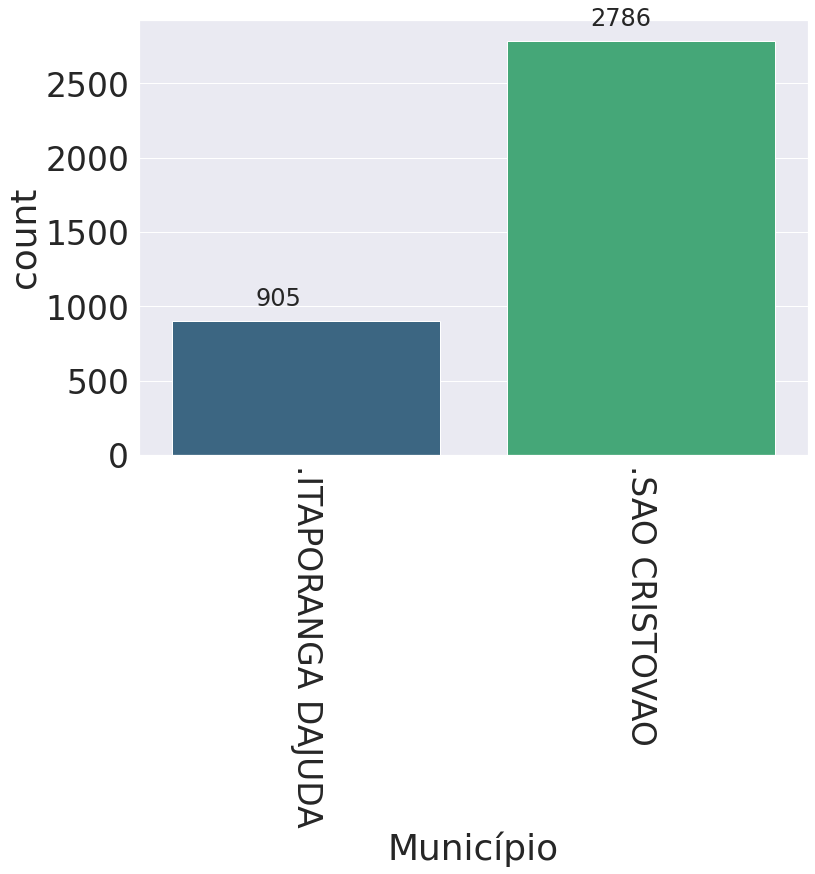

In [225]:
#Plotando o Gráfico
fig, axs = plt.subplots(figsize = (12, 8))

yr=sns.countplot(data = df2, x = 'Município',palette='viridis')
yr.set_xticklabels(yr.get_xticklabels(),rotation=-90);
sns.set(font_scale=2) 
for p in axs.patches:
        axs.annotate((p.get_height()), (p.get_x() + 0.25, p.get_height() + 100))
      

In [160]:
df2.value_counts(df2['Cód. Tipo'])[0:5]

Cód. Tipo
E08420    2013
G01330     540
B01147     193
B08210     163
A05000     111
dtype: int64

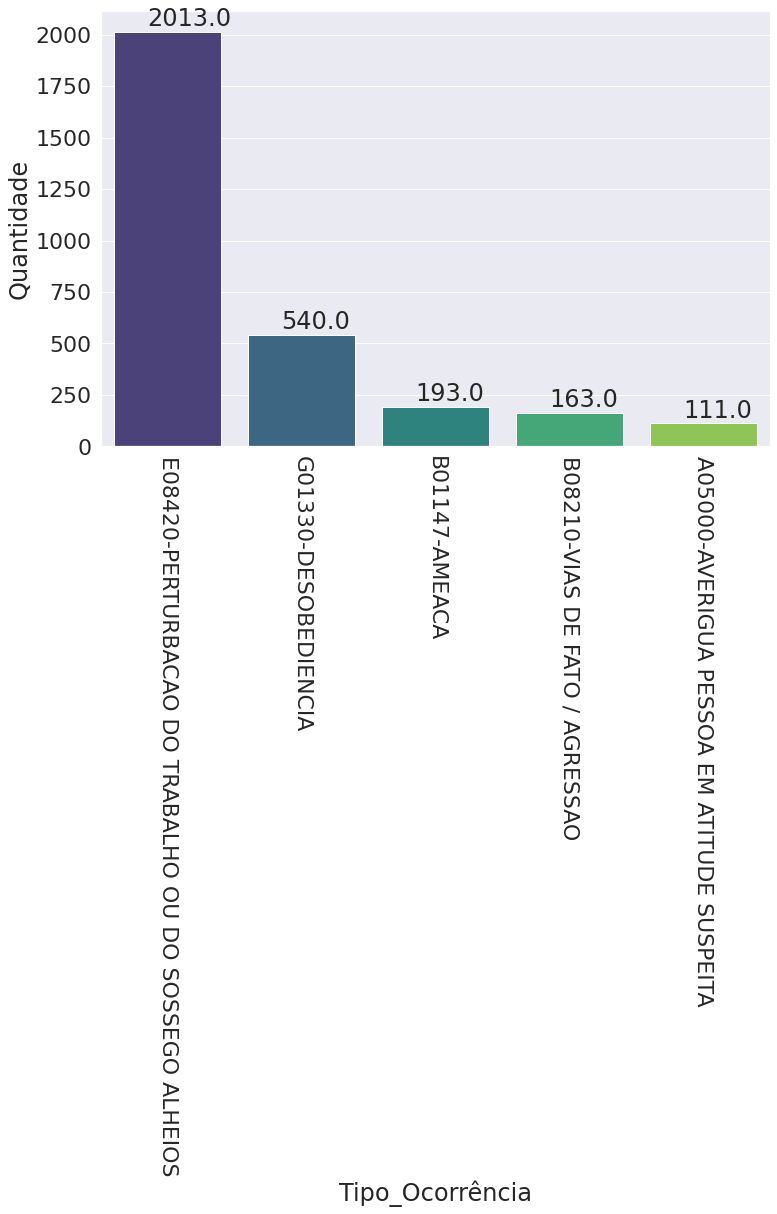

In [226]:
#Plotando o Gráfico
aux=df2[['Cód. Tipo','Descrição']].value_counts().reset_index()[:5]
aux['Tipo_Ocorrência']=aux['Cód. Tipo']+'-'+aux['Descrição']
aux.columns=['Cód. Tipo','Descrição',"Quantidade",'Tipo_Ocorrência']
aux.head()
fig, axs = plt.subplots(figsize = (12, 8))
sns.set(font_scale=2) 

yr=sns.barplot(x=aux['Tipo_Ocorrência'],y=aux["Quantidade"],palette='viridis');
yr.set_xticklabels(yr.get_xticklabels(),rotation=-90);
for p in axs.patches:
        axs.annotate((p.get_height()), (p.get_x() + 0.25, p.get_height() + 30))

In [161]:
df2.value_counts(df2['Meses'])

Meses
3    1374
1    1254
2    1063
dtype: int64

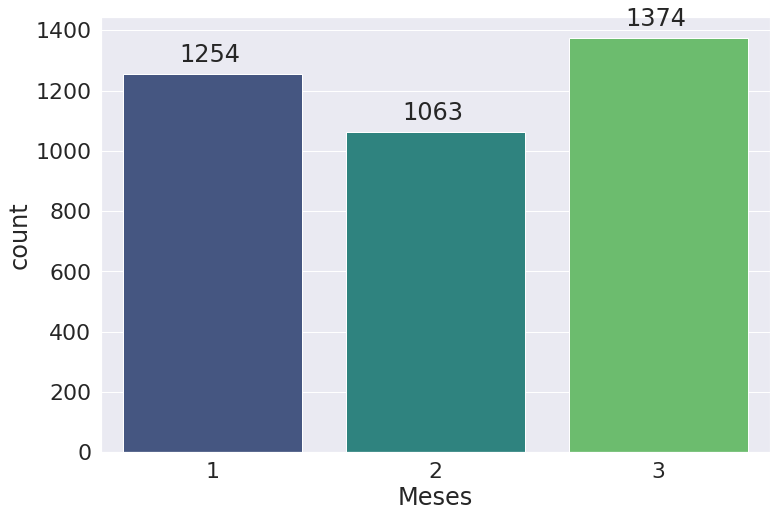

In [227]:
#Plotando o Gráfico
fig, axs = plt.subplots(figsize = (12, 8))

sns.countplot(data = df2, x = 'Meses',palette='viridis')
sns.set(font_scale=2) 
for p in axs.patches:
        axs.annotate((p.get_height()), (p.get_x() + 0.25, p.get_height() + 40))

In [162]:
df2.value_counts(df2['Descrição_Finalização'])

Descrição_Finalização
NADA CONSTATADO                                         2073
RESOLVIDO NO LOCAL                                       482
FALTA DE VIATURA DISPONIVEL NA AREA E ESPECIALIZADAS     332
AUTOR EVADIU-SE DO LOCAL                                 276
OCORRÊNCIA JÁ ATENDIDA                                   145
SOLICITANTE NÃO INF. O SUFICIENTE                        101
ENDEREÇO NÃO LOCALIZADO                                   83
CONDUZIDO A DELEGACIA                                     72
DESISTÊNCIA DO SOLICITANTE                                36
NÃO É COMPETÊNCIA PM/BM/PC                                22
QTC GERAL                                                 19
TRANSFERIDO PARA OUTRO ÓRGÃO/ÁREA                         17
OUTRA VTR NO LOCAL                                        15
TERMO CIRCUNSTANCIADO                                     11
LAVRADO AUTO DE INFRAÇÃO DE TRÂNSITO                       5
CONTINGÊNCIA                                               2
dt

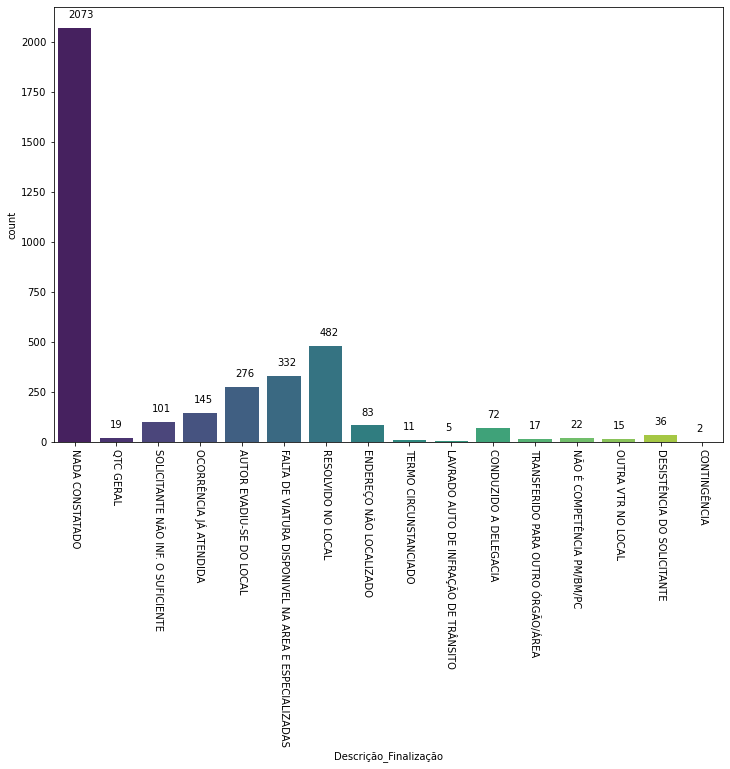

In [201]:
#Plotando o Gráfico
fig, axs = plt.subplots(figsize = (12, 8))

yr=sns.countplot(data = df2, x = 'Descrição_Finalização',palette='viridis')
yr.set_xticklabels(yr.get_xticklabels(),rotation=-90);
for p in axs.patches:
        axs.annotate((p.get_height()), (p.get_x() + 0.25, p.get_height() + 50))
        

       

### 4. Fazendo as Estatísticas com os dados Limpos

### 4.1 Cidade de São Cristovão

In [175]:
# Total das ocorrencias atendidass por cidade
# 1. Filtrar os dados da coluna municipio
Tot_sc = df2[df2['Município'] == '.SAO CRISTOVAO'].shape[0]
print( '\n O total de Ocorrências no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: {}'.format( Tot_sc ) )

#Valor total dividido por 3(( arredondarrr))
mes_sc= Tot_sc/3
print( '\n O total de Ocorrências no por Mês no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: {}'.format(round(mes_sc ) ))

#Média diária ( arredondarrr)
md_sc= Tot_sc/90
print( '\n O total de Ocorrências atendidas por dia no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: {}'.format(round(md_sc ) ))

jan_sc=df2[(df2['Município'] == '.SAO CRISTOVAO')&(df2['Meses']==1)].shape[0]
print( '\n O total de Ocorrências atendidas no mês de Janeiro no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: {}'.format(jan_sc))

fev_sc=df2[(df2['Município'] == '.SAO CRISTOVAO')&(df2['Meses']==2)].shape[0]
print( '\n O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: {}'.format(fev_sc))

mar_sc=df2[(df2['Município'] == '.SAO CRISTOVAO')&(df2['Meses']==3)].shape[0]
print( '\n O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: {}'.format(mar_sc))



 O total de Ocorrências no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: 2786

 O total de Ocorrências no por Mês no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: 929

 O total de Ocorrências atendidas por dia no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: 31

 O total de Ocorrências atendidas no mês de Janeiro no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: 919

 O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: 787

 O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: 1080


### 4.2 Cidade de Itaporanga DAJUDA

In [176]:
# Total das ocorrencias atendidass por cidade
# 1. Filtrar os dados da coluna municipio
Tot_ip = df2[df2['Município'] == '.ITAPORANGA DAJUDA'].shape[0]
print( '\n O total de Ocorrências no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: {}'.format( Tot_ip ) )

#Valor total dividido por 3(( arredondarrr))
mes_ip= Tot_ip/3
print( '\n O total de Ocorrências no por Mês no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: {}'.format(round(mes_ip ) ))

#Média diária ( arredondarrr)
md_ip= Tot_ip/90
print( '\n O total de Ocorrências atendidas por dia no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: {}'.format(round(md_ip )) )

jan_ip=df1[(df1['Município'] == '.ITAPORANGA DAJUDA')&(df2['Meses']==1)].shape[0]
print( '\n O total de Ocorrências atendidas no mês de Janeiro no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: {}'.format(jan_ip))

fev_ip=df1[(df1['Município'] == '.ITAPORANGA DAJUDA')&(df2['Meses']==2)].shape[0]
print( '\n O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: {}'.format(fev_ip))

mar_ip=df1[(df1['Município'] == '.ITAPORANGA DAJUDA')&(df2['Meses']==3)].shape[0]
print( '\n O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: {}'.format(mar_ip))



 O total de Ocorrências no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: 905

 O total de Ocorrências no por Mês no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: 302

 O total de Ocorrências atendidas por dia no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: 10

 O total de Ocorrências atendidas no mês de Janeiro no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: 335

 O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: 276

 O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: 294


### 5. Filtrando por Tipos de Ocorrẽncias

In [178]:
# filtrando por tipo de Ocorrências 
#criando auxiliar para filtrar por cidade
aux=df2[df2.Município=='.SAO CRISTOVAO']
aux[['Descrição', 'Cód. Tipo',"Ocorrência"]].groupby(['Descrição', 'Cód. Tipo']).count().sort_values(by = 'Ocorrência', ascending = False).head(5).reset_index()



,Descrição,Cód. Tipo,Ocorrência
0,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,E08420,1450
1,DESOBEDIENCIA,G01330,428
2,AMEACA,B01147,148
3,VIAS DE FATO / AGRESSAO,B08210,131
4,AVERIGUA PESSOA EM ATITUDE SUSPEITA,A05000,89


In [ ]:
#Gráfico

## 5.2 Cidade de Itaporanga

In [228]:
# filtrando por tipo de Ocorrências 
#criando auxiliar para filtrar por cidade
aux=df2[df2.Município=='.ITAPORANGA DAJUDA']
aux[['Descrição', 'Cód. Tipo',"Ocorrência"]].groupby(['Descrição', 'Cód. Tipo']).count().sort_values(by = 'Ocorrência', ascending = False).head(6).reset_index()



,Descrição,Cód. Tipo,Ocorrência
0,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,E08420,563
1,DESOBEDIENCIA,G01330,112
2,AMEACA,B01147,45
3,VIAS DE FATO / AGRESSAO,B08210,32
4,AVERIGUA PESSOA EM ATITUDE SUSPEITA,A05000,22
5,ROUBO,C01157,20


In [ ]:
# Totais